#### Tarea 4.
### Funciones, Modelos personalizados y Ecuaciones Diferenciales 

- Diseñar una capa en keras que transforme imágenes a color en escala de grises.

Usaré la base de datos MNIST.
También que la fórmula estándar para convertir de color a escala de grises es:

$L  = 0.2989R + 0.5870G + 0.1140B$

In [12]:
import tensorflow as tf
from tensorflow.keras import layers 

class EscalaGrises(layers.Layer): #definimos la clase
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs): #llamar cuando la capa recibe input
        x= tf.cast(inputs, tf.float32) #convertimos a flotantes los inputs =x
        coefs = tf.constant([0.2989, 0.5870,0.1140], dtype=tf.float32) #valores de escala de grises 
        gray = tf.tensordot(x, coefs, axes=[-1,0]) 
#producto entre las entradas y el vector de constantes para aplicar la transformación en el último eje de x y el primero de coef
        gray = tf.expand_dims(gray, axis=-1) #expandimos dimension 
        return grises
    

Podemos probar si la capa funciona usando las imágenes de MNIST

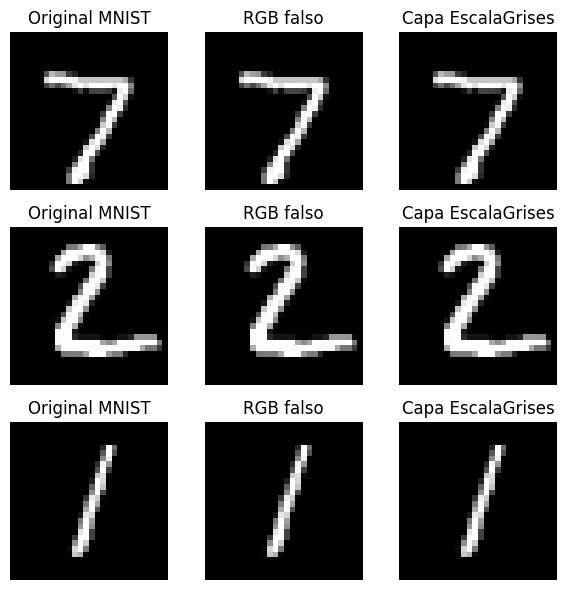

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_test = x_test.astype("float32") / 255.0 # normalizamos con max pixeles 
x_test = x_test[..., tf.newaxis]  # otra dimensión (28,28,1)

# crear versión RGB repitiendo el canal
x_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))  # (28,28,3)

# aplicamos la capa 
gray_layer = EscalaGrises()
x_test_gray = gray_layer(x_test_rgb)

# mostrar comparación
fig, axs = plt.subplots(3,3, figsize=(6,6)) #3 fig, 3 columnas, tamaño de imagenes
for i in range(3):
    axs[i,0].imshow(x_test[i].squeeze(), cmap="gray") #imagen i en la primera columna
    axs[i,0].set_title("Original MNIST")
    axs[i,0].axis("off")

    axs[i,1].imshow(x_test_rgb[i]) # RGB a las imagenes, columna 2
    axs[i,1].set_title("RGB falso")
    axs[i,1].axis("off")

    axs[i,2].imshow(x_test_gray[i].numpy().squeeze(), cmap="gray") #capa en las imagenes RGB, columna 3
    axs[i,2].set_title("Capa EscalaGrises")
    axs[i,2].axis("off")

plt.tight_layout()
plt.show()


Aplicar RGB sobre estas imagenes no hace notar mucho la diferencia, usaré la base de datos $CIFAR-10$ puede ser mejor, ya que tiene imagenes a color.

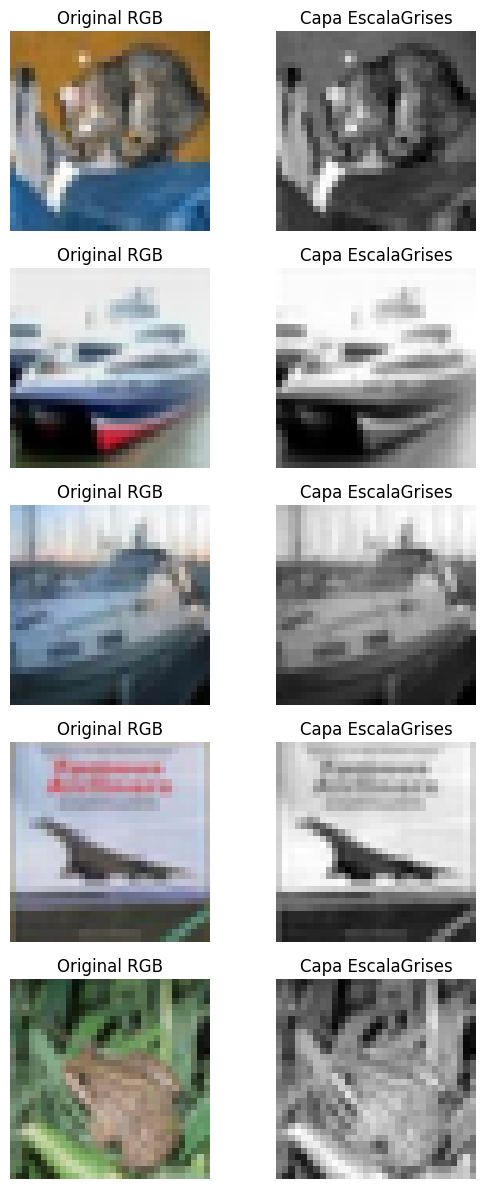

In [21]:
# Cargar CIFAR-10
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_test = x_test.astype("float32") / 255.0  # normalizamos
x_sample = x_test[:5] #muestra de 5 imagenes

gr_layer = EscalaGrises() #nuestra capa
x_gray = gr_layer(x_sample).numpy() #aplicamos la capa a la muestra

#columnas de imagenes 
fig, axs = plt.subplots(5, 2, figsize=(6, 12)) #5 imagenes, 2 columnas
for i in range(5):
    axs[i, 0].imshow(x_sample[i]) #muestra de la base original, columna 1
    axs[i, 0].axis("off")
    axs[i, 0].set_title("Original RGB")

    axs[i, 1].imshow(x_gray[i].squeeze(), cmap="gray")  #EscalaGrises en la muestra, columna 2
    axs[i, 1].axis("off")
    axs[i, 1].set_title("Capa EscalaGrises")
plt.tight_layout()
plt.show()
